<a href="https://colab.research.google.com/github/mavy731/UIUC-MSFE-FALL20-IE525/blob/main/Project2/IE525_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://news.illinois.edu/files/6367/543635/116641.jpg" alt="University of Illinois" width="250"/>

## Project 2: Gaussian Random Variables ##

### Due 2021-Feb-12 23:59:59 CST ###

Project submission by group (optimally 4 people, please list all your group members below, with names and email addresses)
* Dong Zhu dongzhu2@illinois.edu
* Yue Ma yuema4@illinois.edu
* Junye Qiu junyeq2@illinois.edu
* Aigerim Tursynbekova aigerim4@illinois.edu

Note 0:  Anaconda Python <https://www.anaconda.com/distribution/> is a strong implementation of python.

Note 1: Suggest using Google Colab to work in groups. Google colab is a sharable type of Jupyter Notebook. To work on google colab, first save a copy of this file to your own drive using **File>Save a copy in Drive** and share the saved copy among group members. (Be sure to log on Google colab and Google Drive with your Illinois Google account. Please refer to https://itservices.illinois.edu/services/google-apps-illinois/details for more information of your Illinois Google account).

Note 2: For submission, please do the following two steps, both before the due time **(late submissions are not acceptable)**:

*   Download the finished notebook as an **.ipynb** file and upload the file to Gradescope (one upload per group will be enough, please ignore the Autograder if you see it when uploading)
*   (If using Google Colab) Send a sharable link to me via email: <qiz2@illinois.edu> (one email per group will be enough)


### imports and graphics configurations ###

In [20]:
import numpy as np
import pandas as pd
import time
import random
import matplotlib
#%matplotlib notebook
import matplotlib.pyplot as plt
import scipy.stats
import matplotlib.offsetbox as offsetbox
from matplotlib.ticker import StrMethodFormatter

In [44]:
#for some reason, this needs to be in a separate cell
params={
    "font.size":15,
    "lines.linewidth":5,
}
plt.rcParams.update(params)
  
def ComputeReturn(df):
    adj=df["Adj Close"]
    adj_lag=adj.shift(periods=1)
    ret=adj-adj_lag
    ret=ret.dropna()
    return ret

        
def textbox(txt,fname=None):
    plt.figure(figsize=(1,1))
    plt.gca().add_artist(offsetbox.AnchoredText("\n".join(txt), loc="center",prop=dict(size=30)))
    plt.axis('off')
    if fname is not None:
        saver(fname)
    plt.show()
    plt.close()

# **Gaussian Random Variables (30 pts)** #

**Task 1 (Gaussian Stock Returns):** For a stock of your choice, first get stock prices from Yahoo Finance for a two-year period.  Make QQ plots of returns over
* Days (Daily Data)
* Weeks (Weekly Data)
* Months (Monthly Data)  

Which is most Gaussian?  Explain your reasoning and make your own analysis of the reasons. (20 pts)

***Import Data***

In [59]:
daily = pd.read_csv("/content/F_daily.csv").set_index("Date",drop=True)
weekly = pd.read_csv("/content/F_weekly.csv").set_index("Date",drop=True)
monthly = pd.read_csv("/content/F_monthly.csv").set_index("Date",drop=True)
F_d=ComputeReturn(daily)
F_w=ComputeReturn(weekly)
F_m=ComputeReturn(monthly)

***QQ-Plot***

Text(0.5, 1.0, 'Monthly')

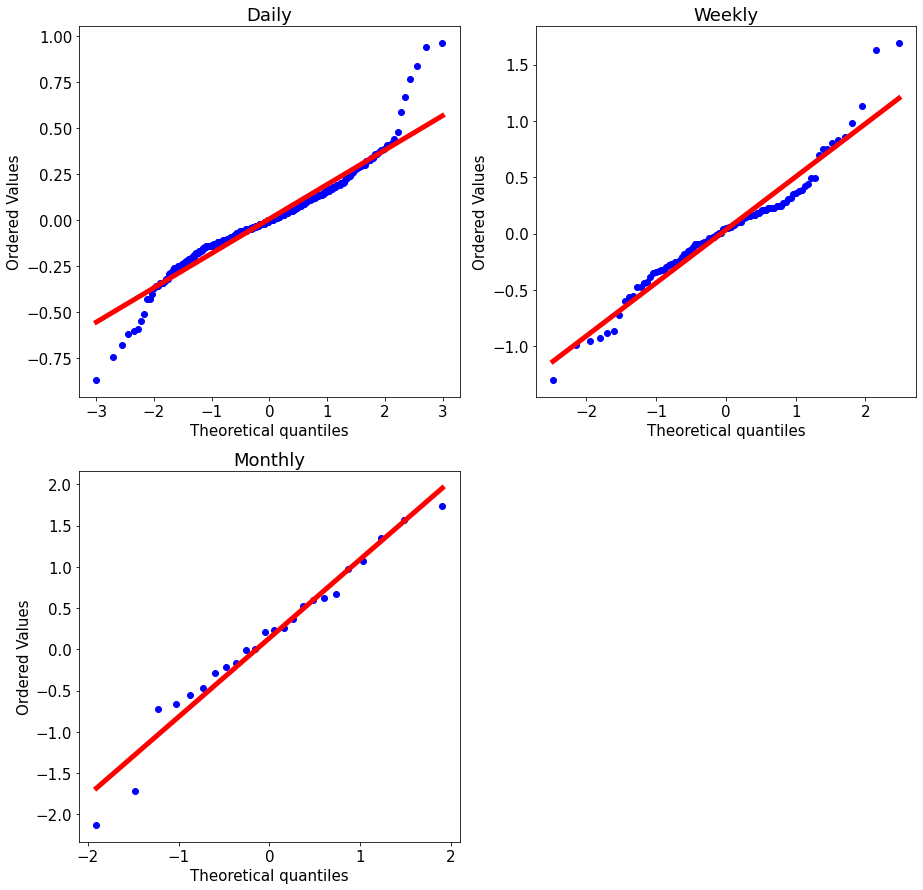

In [81]:
fig = plt.subplots(2, 1, figsize=(15, 15))
ax1 = plt.subplot(221)
scipy.stats.probplot(F_d,dist="norm", plot=plt)
ax1.set_title("Daily")
ax2 = plt.subplot(222)
scipy.stats.probplot(F_w,dist="norm", plot=plt)
ax2.set_title("Weekly")
ax3 = plt.subplot(223)
scipy.stats.probplot(F_m,dist="norm", plot=plt)
ax3.set_title("Monthly")


***Conclusion***

From the QQ-plot, the monthly return is the most Gaussion, since it fits the straight line best.

**Task 2 (Gaussian Moments):** Let $\eta$ be a standard Gaussian random variable.  By simulation, compute $E\left[\exp\left[\tfrac14\eta\right]\right]$ and compare with the theoretical value. (10 pts)

1.031757517429801


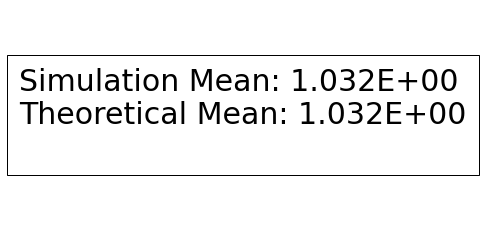

In [111]:
eta=np.random.normal(loc=0.0, scale=1.0, size=10000000)
Simulation_Mean=np.mean(np.exp(0.25*eta))
Theoretical_Mean=np.exp(0.5*0.25*0.25)
print(Simulation_Mean)

text_str="Simulation Mean: {:.3E}\nTheoretical Mean: {:.3E}\n"
text_str=text_str.format(Simulation_Mean,Theoretical_Mean)
fig,ax=plt.subplots()
ax.add_artist(offsetbox.AnchoredText(text_str, loc="center",prop=dict(size=30)))
ax.axis('off')
plt.show()
plt.close()